In [38]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime as dt
from matplotlib import pyplot as plt

In [39]:
# This strategy is for TLT.

In [40]:
tlt = yf.Ticker("TLT")
df = tlt.history(period = "max")
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-07-30,41.352758,41.428635,41.236412,41.236412,6100,0.000,0
2002-07-31,41.453890,41.883860,41.428600,41.747280,29400,0.000,0
2002-08-01,41.752359,41.995162,41.752359,41.985046,25000,0.000,0
2002-08-02,42.065983,42.541473,41.924343,42.415012,52800,0.000,0
2002-08-05,42.511128,42.713467,42.415017,42.602180,61100,0.000,0
...,...,...,...,...,...,...,...
2022-12-13,108.776880,108.816784,107.200691,107.440109,23854700,0.000,0
2022-12-14,107.400209,108.058612,106.632062,107.899002,19517500,0.000,0
2022-12-15,108.389999,109.120003,108.160004,108.320000,20246200,0.261,0


In [41]:
df = df.drop(["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"], axis = 1)
df["Day"] = df.index.day
df["buy"] = [0] * len(df)
df["sell"] = [0] * len(df)
df

,Close,Day,buy,sell
Date,,,,
2002-07-30,41.236412,30,0,0
2002-07-31,41.747280,31,0,0
2002-08-01,41.985046,1,0,0
2002-08-02,42.415012,2,0,0
2002-08-05,42.602180,5,0,0
...,...,...,...,...
2022-12-13,107.440109,13,0,0
2022-12-14,107.899002,14,0,0
2022-12-15,108.320000,15,0,0


In [42]:
type(df.index)  # Date index is DateTime type.

pandas.core.indexes.datetimes.DatetimeIndex

In [43]:
# Set the initial capital
initial_capital= float(10000)

In [44]:
df.loc[
    (
        (df["Day"] >= 25)
        #(df["buy"].shift(1) == 0)
    ),
    
"buy"] = 1

# But this causes adjacent "buy" = 1 values.

df.loc[
    (
 
        (df["Day"] <= 7) &
        (df["Day"] > 3)
        #(df["sell"].shift(1) == 0)
    ),
    
"sell"] = 1

# But this causes adjacent "sell" = 1 values.

df.loc[
    (
        (df["buy"].shift(1) == 1)
    ),
    
"buy"] = 0

# Clean the buy values.

df.loc[
    ( 
        (df["sell"].shift(1) == 1)
    ),
    
"sell"] = 0

# Clean the sell values.

In [45]:
df

,Close,Day,buy,sell
Date,,,,
2002-07-30,41.236412,30,1,0
2002-07-31,41.747280,31,0,0
2002-08-01,41.985046,1,0,0
2002-08-02,42.415012,2,0,0
2002-08-05,42.602180,5,0,1
...,...,...,...,...
2022-12-13,107.440109,13,0,0
2022-12-14,107.899002,14,0,0
2022-12-15,108.320000,15,0,0


In [46]:
cash_contracts_equity = [initial_capital, 0, initial_capital]
cash_contracts_equity = np.array([cash_contracts_equity] * len(df))

cash_contracts_equity[0][0] = initial_capital  # cash
cash_contracts_equity[0][1] = 0  # contracts
cash_contracts_equity[0][2] = initial_capital  # equity

cash_contracts_equity

array([[10000.,     0., 10000.],
       [10000.,     0., 10000.],
       [10000.,     0., 10000.],
       ...,
       [10000.,     0., 10000.],
       [10000.,     0., 10000.],
       [10000.,     0., 10000.]])

In [47]:
cash_contracts_equity[0][0]

10000.0

In [48]:
df[0:50]

,Close,Day,buy,sell
Date,,,,
2002-07-30,41.236412,30,1,0
2002-07-31,41.747280,31,0,0
2002-08-01,41.985046,1,0,0
2002-08-02,42.415012,2,0,0
2002-08-05,42.602180,5,0,1
2002-08-06,42.237988,6,0,0
2002-08-07,42.339123,7,0,0
2002-08-08,42.339123,8,0,0
2002-08-09,42.936050,9,0,0


In [49]:
for index, _row in enumerate(df.iterrows()):
    row = _row[1]
    
    
    if row["buy"] == 1:
        if index == 1:
            cash_contracts_equity[index][1] = (cash_contracts_equity[index][0] / row["Close"])
            cash_contracts_equity[index][0] = 0
        else:
            cash_contracts_equity[index][1] = (cash_contracts_equity[index - 1][0] / row["Close"])
            cash_contracts_equity[index][0] = 0
    
    elif row["sell"] == 1:
        cash_contracts_equity[index][0] = (cash_contracts_equity[index - 1][1] * row["Close"])
        cash_contracts_equity[index][1] = 0
    
    elif row["buy"] == 0 and row["sell"] == 0:
        cash_contracts_equity[index][1] = cash_contracts_equity[index - 1][1]
        cash_contracts_equity[index][0] = cash_contracts_equity[index - 1][0]
    
        
    cash_contracts_equity[index][2] = (cash_contracts_equity[index][0] + (cash_contracts_equity[index][1] * row["Close"]))

In [50]:
cash_contracts_equity[0:10]

array([[    0.        ,   242.50412447, 10000.        ],
       [    0.        ,   242.50412447, 10123.88761464],
       [    0.        ,   242.50412447, 10181.54691478],
       [    0.        ,   242.50412447, 10285.81543658],
       [10331.20447798,     0.        , 10331.20447798],
       [10331.20447798,     0.        , 10331.20447798],
       [10331.20447798,     0.        , 10331.20447798],
       [10331.20447798,     0.        , 10331.20447798],
       [10331.20447798,     0.        , 10331.20447798],
       [10331.20447798,     0.        , 10331.20447798]])

In [51]:
cash_contracts_equity.T

array([[    0.        ,     0.        ,     0.        , ...,
        15038.49953216, 15038.49953216, 15038.49953216],
       [  242.50412447,   242.50412447,   242.50412447, ...,
            0.        ,     0.        ,     0.        ],
       [10000.        , 10123.88761464, 10181.54691478, ...,
        15038.49953216, 15038.49953216, 15038.49953216]])

In [52]:
df["cash"] = cash_contracts_equity.T[0]
df["contracts"] = cash_contracts_equity.T[1]
df["equity"] = cash_contracts_equity.T[2]
df["equity_change_cumsum"] = df["equity"].pct_change().cumsum()
df["TLT_change_cumsum"] = df["Close"].pct_change().cumsum()
df

,Close,Day,buy,sell,cash,contracts,equity,equity_change_cumsum,TLT_change_cumsum
Date,,,,,,,,,
2002-07-30,41.236412,30,1,0,0.000000,242.504124,10000.000000,NaN,NaN
2002-07-31,41.747280,31,0,0,0.000000,242.504124,10123.887615,0.012389,0.012389
2002-08-01,41.985046,1,0,0,0.000000,242.504124,10181.546915,0.018084,0.018084
2002-08-02,42.415012,2,0,0,0.000000,242.504124,10285.815437,0.028325,0.028325
2002-08-05,42.602180,5,0,1,10331.204478,0.000000,10331.204478,0.032738,0.032738
...,...,...,...,...,...,...,...,...,...
2022-12-13,107.440109,13,0,0,15038.499532,0.000000,15038.499532,0.471877,0.471877
2022-12-14,107.899002,14,0,0,15038.499532,0.000000,15038.499532,0.471877,0.471877
2022-12-15,108.320000,15,0,0,15038.499532,0.000000,15038.499532,0.471877,0.471877


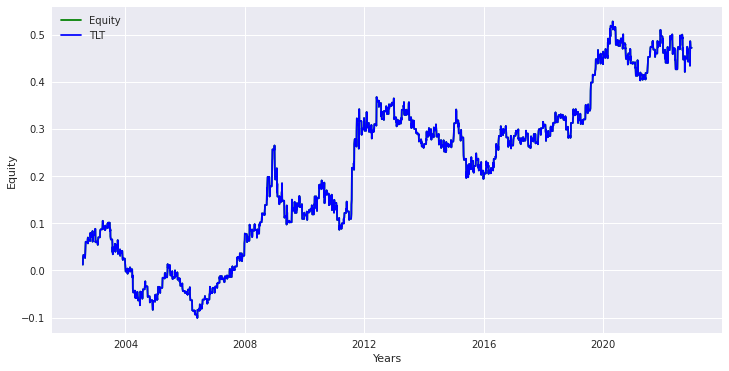

In [53]:
plt.style.use("seaborn")
plt.figure(figsize = (12, 6))
plt.plot(df.index, df["equity_change_cumsum"], c = "g", label = "Equity")
plt.plot(df.index, df["TLT_change_cumsum"], c = "b", label = "TLT")
plt.xlabel("Years")
plt.ylabel("Equity")
plt.legend()